<a href="https://colab.research.google.com/github/upwind1993/AI-Mechanical-Engineering/blob/main/0924/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80(%ED%95%B8%EC%A6%88%EC%98%A8%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀
정규 방정식(강의 자료 11페이지 ~ )

In [7]:
import numpy as np

np.random.seed(42)  # 코드 예제를 재현 가능하게 만들기 위해
m = 100  # 샘플 개수
X = 2 * np.random.rand(m, 1)  # 열 벡터
y = 4 + 3 * X + np.random.randn(m, 1)  # 열 벡터

rand(  ): 균등분포 랜덤 함수 생성(0~1)
<br> randn( ): 정규분포 랜덤 함수 생성

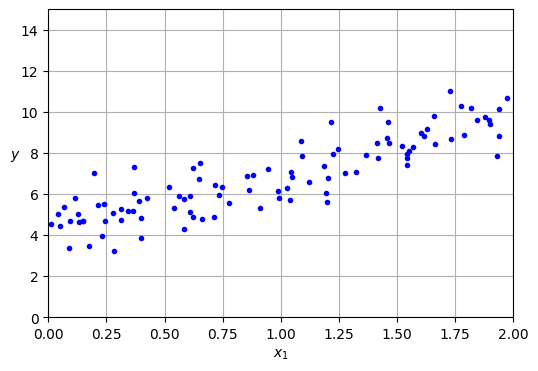

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

사이킷런으로 선형회귀 수행

In [9]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # 각 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [10]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [11]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # 각 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

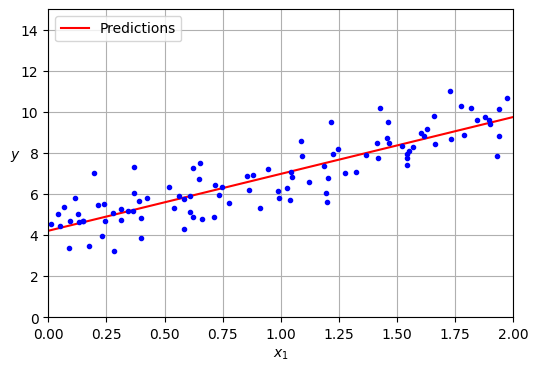

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # 추가 코드
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# 추가 코드 - 그림 4-2를 꾸미고 저장합니다.
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [14]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

LinearRegression 클래스는 scipy.linalg.lstsq() 함수("least squares"의 약자)를 사용하므로 이 함수를 직접 사용할 수 있습니다:


In [15]:
# (yhat - y) ** 2, rank = 2, svd -- >최대,잇간•rcond > 특이 값은 모두 0

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

이 함수는 $\mathbf{X}^+ \mathbf{y}$를
을 계산합니다.  $\mathbf{X}^+$는  $\mathbf{X}$ 의 유사역행렬 (pseudoinverse)입니다(Moore–Penrose 유사역행렬입니다). np.linalg.pinv()을 사용해서 유사역행렬을 직접 계산할 수 있습니다:

In [16]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

**경사하강법**
<br>배치경사하강법

In [17]:
eta = 0.1  # 학습률, 작은 숫자로 하여 천천히 내려가도록 함
n_epochs = 1000
m = len(X_b)  # 샘플 개수

np.random.seed(42)
theta = np.random.randn(2, 1)  # 모델 파라미터를 랜덤하게 초기화합니다

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

$\displaystyle \frac{\partial}{\partial \theta} \text{MSE}(\theta) = \frac{2}{m} \mathbf{X}^T (\mathbf{X}\theta - \mathbf{y})$

$\displaystyle \theta^{\text{(next step)}} = \theta - \eta \frac{\partial}{\partial \theta} \text{MSE}(\theta)$

In [18]:
theta

array([[4.21509616],
       [2.77011339]])

교과서에 나와있는 그림 여러 가지 학습률에 대한 경사하강법(그림 4-8)

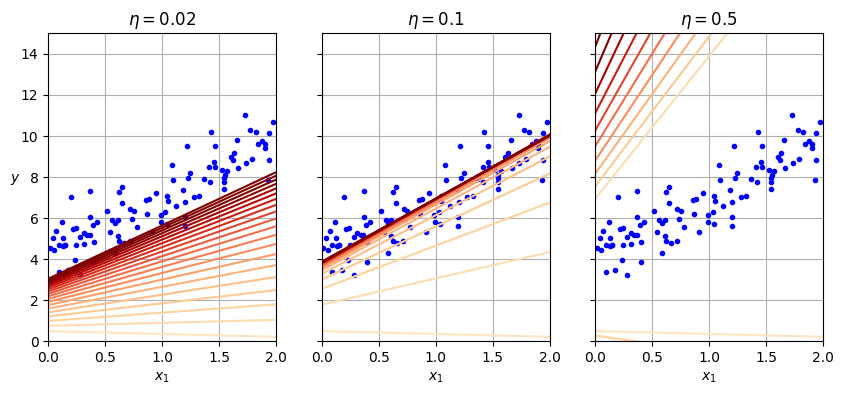

In [19]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # 랜덤 초기화

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
plt.show()

# 확률적 경사하강법

In [20]:
theta_path_sgd = []  # 추가 코드 - 다음 그림을 그리기 위해 매개변수 공간에서 theta의 경로를 저장합니다.

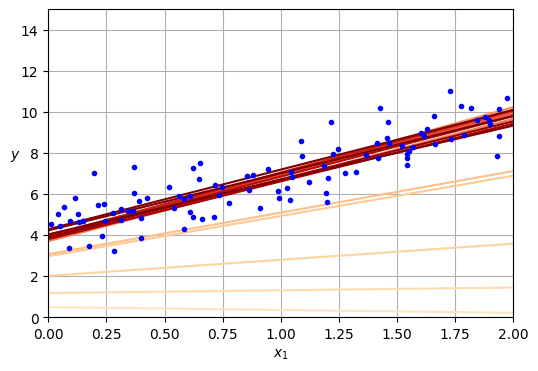

In [21]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # 랜덤 초기화

n_shown = 20  # 추가 코드 - 아래 그림을 생성하는 데만 필요합니다.
plt.figure(figsize=(6, 4))  # 추가 코드

for epoch in range(n_epochs):
    for iteration in range(m):

        # 추가 코드 - 이 네 라인은 그림을 생성하는 데 사용됩니다.
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # SGD의 경우 m으로 나누지 않습니다
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)  # 추가 코드 - 그림을 생성하기 위해

# 추가 코드 - 이 섹션은 그림 4-10을 꾸미고 저장합니다.
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [22]:
theta

array([[4.21076011],
       [2.74856079]])

In [23]:
from sklearn.linear_model import SGDRegressor
# learning_rate='invscaling' eta0/t ** 0.25,y'constant', 'optimal', 'adaptive' 등이 있음
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # fit()이 1D 타깃을 기대하기 때문에 y.ravel()로 씁니다

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [24]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

## 미니배치 경사 하강법

교과서에 나와있는 그림 - 파라메터 공간에 표시된 경사하강법의 경로(그림 4-11)

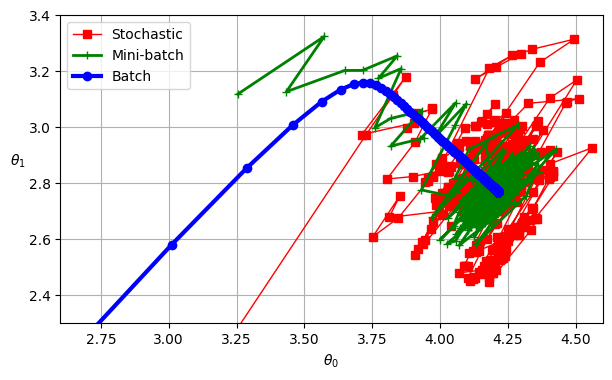

In [25]:
from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # 랜덤 초기화

t0, t1 = 200, 1000  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m) # 0에서 m-1 개수의 샘플링을 진행하고 permutation을 사용(중복허용 안하고, 섞음)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
# save_fig("gradient_descent_paths_plot")
plt.show()

# 다항 회귀

In [26]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

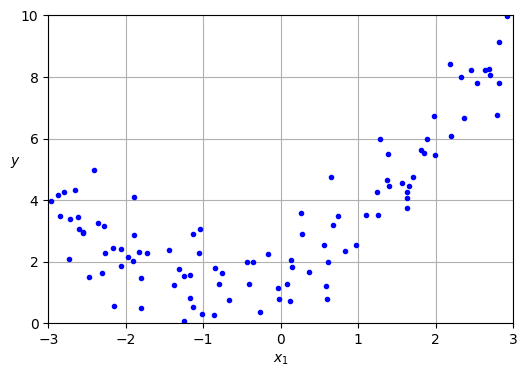

In [28]:
# 추가 코드 - 이 셀은 그림 4-12를 생성하고 저장합니다.
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
# save_fig("quadratic_data_plot")
plt.show()

In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [36]:
X_poly[0]

array([-0.75275929,  0.56664654])

PolynomialFeatures의 세부 사항을 알고 싶을때? -> 도움말 생성

In [34]:
PolynomialFeatures?

만약 degree = 3이라면,
<br> 1, a, b, c, a^2, b^2, c^2, a^3, b^3, c^3, ab, bc, ca, a^2b, ab^2,.... 등으로
<br>
<br> interaction = True로 하면,
<br> a, b, c, ab, a^2b 등의 교차항만 사용(^2 등은 사용 안함)
<br>
<br> 어떤 항으로 구성되었는지를 알고자 하면,
<br> poly_features.get_feature_names_out()

In [38]:
poly_features.get_feature_names_out()

array(['x0', 'x0^2'], dtype=object)

lin_reg.intercept_, lin_reg.coef_  : 절편과 계수를 구함

In [41]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

1. 만약?
<br> [29]의 poly_features = PolynomialFeatures(degree=2, include_bias=False)에서 include_bias = True로 하면? 나머지 과정은?

2. [41]에서 lin_reg = LinearRegression()를
<br> lin_reg = LinearRegression(fit_intercept = False)로 하면 (기본값은 True)
<br> intercept를 학습하지 않고, 절편을 첫번째의 절편값을 사용함) ==> 실행해 봄

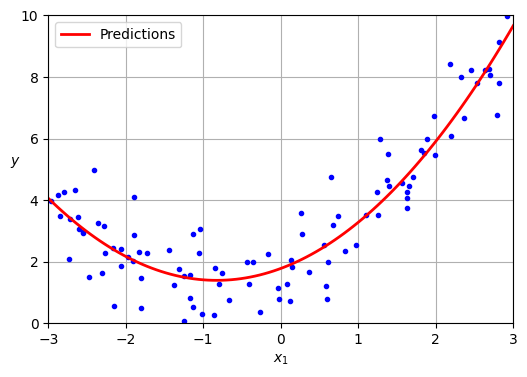

In [43]:
# 추가 코드 - 이 셀은 그림 4-13을 생성하고 저장합니다.

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
# save_fig("quadratic_predictions_plot")
plt.show()

그림 4-14 고차 다항회귀를 그리는 프로그램

과대 적합과 과소적합을 만들고자 함.
>br>2차식, 1차식, 300degree를 만듦.
<br> make_pipeline()은 scikit-learn의 pipeline 모듈에서 제공되는 함수로, 여러 단계의 변환기와 추정기를 순차적으로 연결해주는 역할함. 각 단계는 이전 단계의 출력을 입력으로 받아서 처리

polybig_features는 피처들 간의 상호작용 항이나 제곱항 같은 고차원 피처들을 만들어내서 비선형 데이터를 선형 회귀 모델로 처리할 수 있게 함.

std_scaler:  각 피처의 평균을 0, 표준편차를 1로 맞춰서 데이터의 분포를 표준화하는 데 사용.
<br> lin_reg: 변환된 피처들을 입력으로 받아서 타겟 값을 예측

**파이프라인 실행 시 작동방식:**
<br> 1. x 데이터를 다항식 형태로 변환
<br> 2. 변환된 데이터를 표준화
<br> 3. 표준화된 데이터를 바탕으로 선형 회귀를 수행

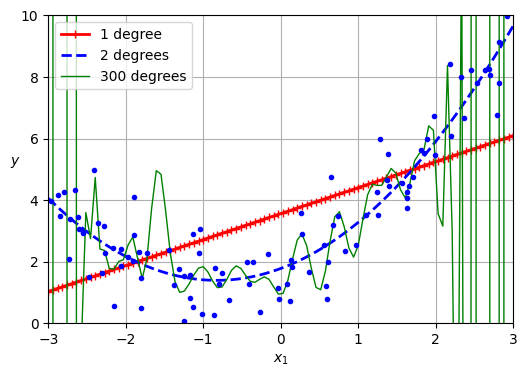

In [60]:

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    # polynomial_regression = make_pipeline(polybig_features, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    # print(polynomial_regression[-1].coef_)  # 마지막 단계가 LinearRegression이므로 [-1]로 접근 가능
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
# save_fig("high_degree_polynomials_plot")
plt.show()

의문]? 선형회귀(Linear Regression)은 특성의 스케일을 만들지 않아도 됩니다(수치적으로 계산함).
<br> 그런데, StandardScaler()를 사용하였음. 이유? 삭제하고 그러면?
<br> 원칙적으로는 사용하지 않아도 되나, 300제곱을 하면 큰값과 작은 값이 곱해져서 가중치 값이 이상해짐(라이브러리 문제)
<br> print로 출력하여 확인해봄

## **학습곡선**

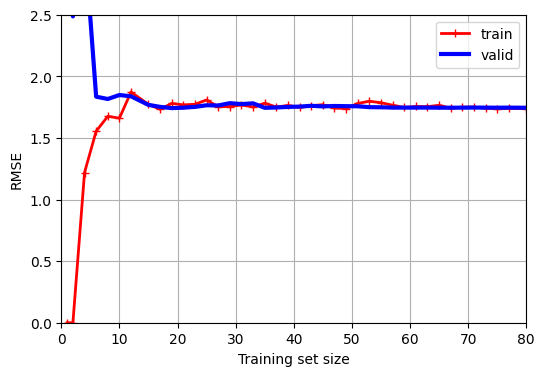

In [63]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # 추가 코드
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# 추가 코드 - 그림 4-15를 꾸미고 저장합니다.
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])
# save_fig("underfitting_learning_curves_plot")
plt.show()

In [64]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

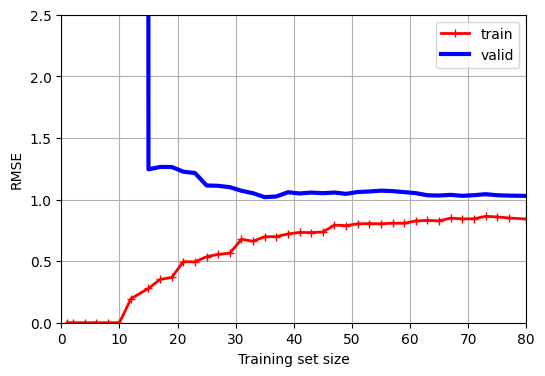

In [66]:
# 추가 코드 - 그림 4-16을 생성하고 저장합니다.

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
# save_fig("learning_curves_plot")
plt.show()